Titanic

The goal will be to predict whether somone survived or not:

The process will be as flows:

* Understand the business problem (classification problem)
* Gather the data
* Clean and explore the data
* Modelling

regresssion - continuous         
classification - class 
    -evaluation:
        accuracy(only when data is balanced)=TP+TN/TP+TN+FN+FP
        precision = TP/TP+FP (when you want FP>FN)
        recall= TP/TP/FN (when you want FN>FP)
        F1score = when FP&FN are equal in weight: harmonic(weighted) mean of precision & recall
        roc(receiver operating curve TPR/FPR) - auc(area under curve) - imbalanced

In [1]:
#Import necessary libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Gather data

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Clean and explore our data

* The 4 Cs are:
** Correcting
** Completing
** Creating
** Converting

In [5]:
# Check for missing values

titanic.isnull().sum()/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
# Fill in missing values
titanic['Age'].fillna(value = titanic['Age'].mean(),inplace= True)
titanic['Embarked'].fillna(value=titanic['Embarked'].mode(),inplace=True)

In [7]:
# Drop cabin
titanic.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [8]:
#Duplicates
titanic.duplicated().sum()

0

# Survived

In [9]:
titanic.Survived.sum()

342

In [10]:
# Check value counts
titanic.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

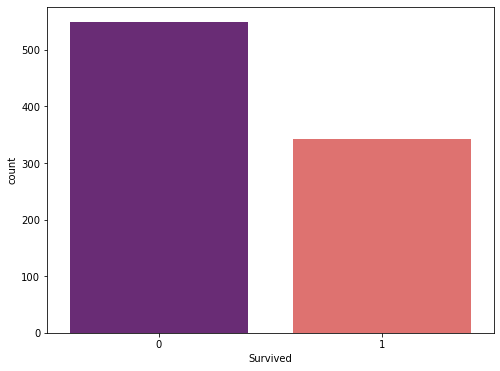

In [11]:
# Visualize
plt.figure(figsize = (8,6))
sns.countplot(x= 'Survived',data = titanic, palette = 'magma')

# PClass

In [12]:
#Count classes
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

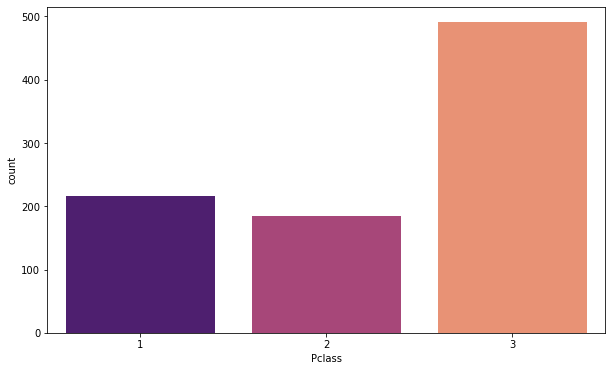

In [13]:
#Visualise it
plt.figure(figsize = (10,6))
sns.countplot(x = 'Pclass',data = titanic,palette = 'magma')

# Sex

In [14]:
titanic.Sex.value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

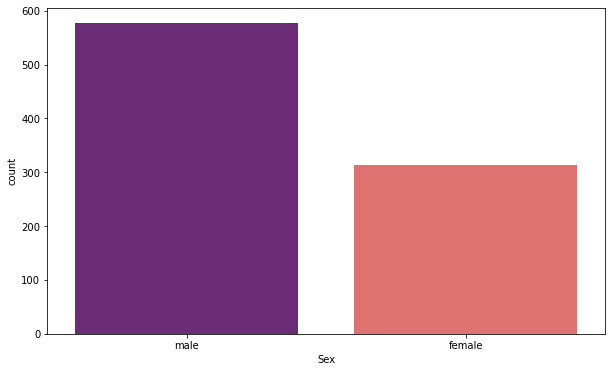

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Sex',data=titanic,palette='magma')

<AxesSubplot:xlabel='Sex', ylabel='count'>

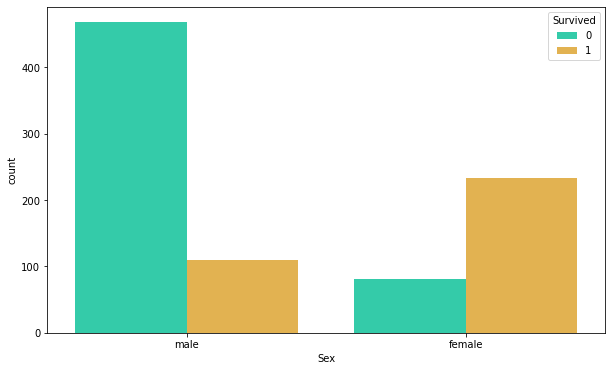

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='Survived',data = titanic,palette='turbo')

We can tell that most women survived. Sex was a factor that affected survival rate

<AxesSubplot:xlabel='Survived', ylabel='count'>

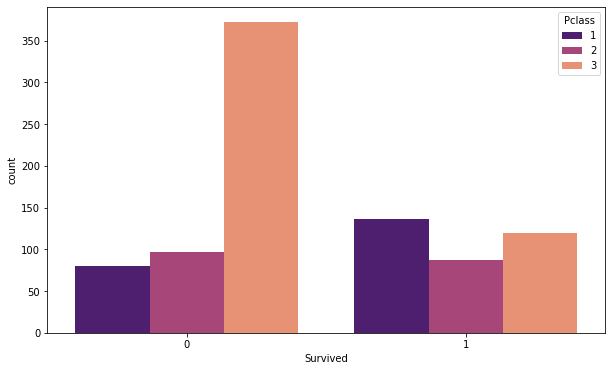

In [17]:
# Visualise 
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Pclass',data = titanic,palette='magma')

First class passsangers were more likely to survive

<AxesSubplot:xlabel='Pclass', ylabel='count'>

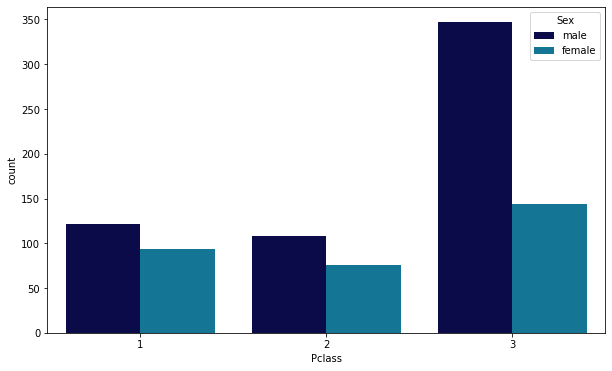

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',hue='Sex',data = titanic,palette='ocean')

Class had a point to play as most men were in third class which had the highest death rate

# Age

C:\Users\Katrina Muchemi\Documents\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

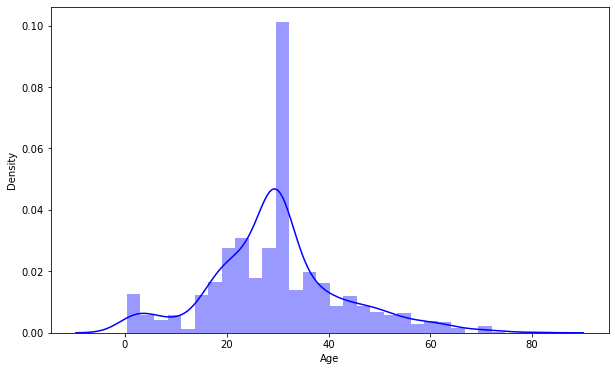

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(titanic['Age'],color='b')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

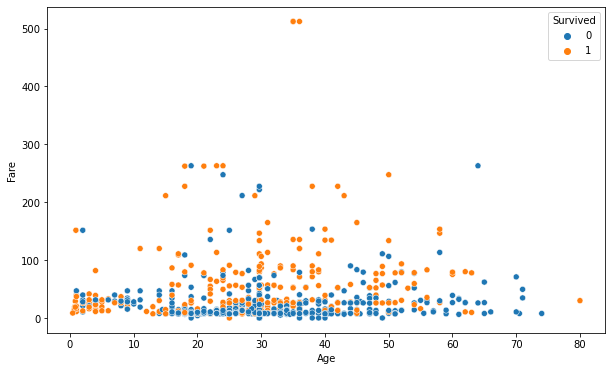

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',hue='Survived',data = titanic)

For children under 5 yrs they were mre likely to survive regardless of the Fare the paid. For majority of the passengers who wer age 20-40, Age had no effect as the basis of survival was directly correlated to fare paid which would inturn decide the Pclass.

In [21]:
# Sipsp & Parch

<AxesSubplot:xlabel='Parch', ylabel='count'>

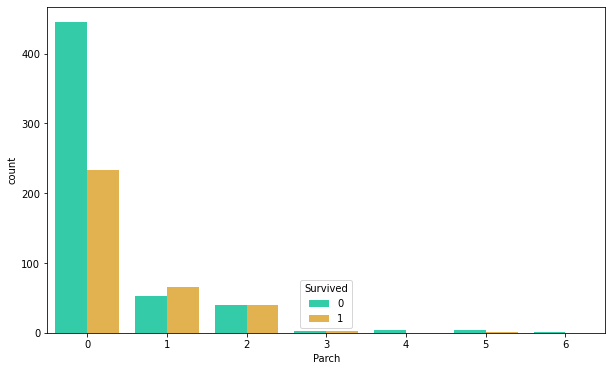

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Parch',hue='Survived',data = titanic,palette='turbo')

Parents and children who were more than 2 pax had a very low likelihood of survival. 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

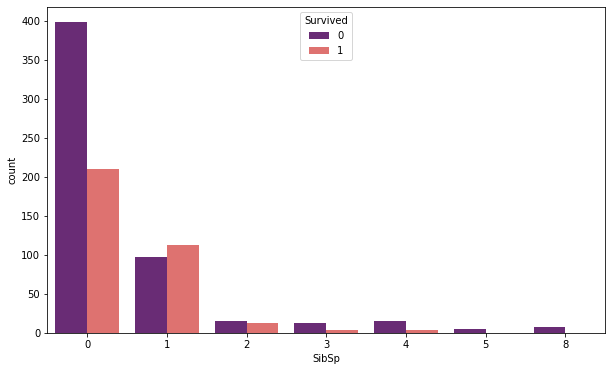

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='SibSp',hue='Survived',data = titanic,palette='magma')

In [24]:
# Create a new feature
titanic['Family']=titanic['Parch']+titanic['SibSp']

<AxesSubplot:xlabel='Family', ylabel='count'>

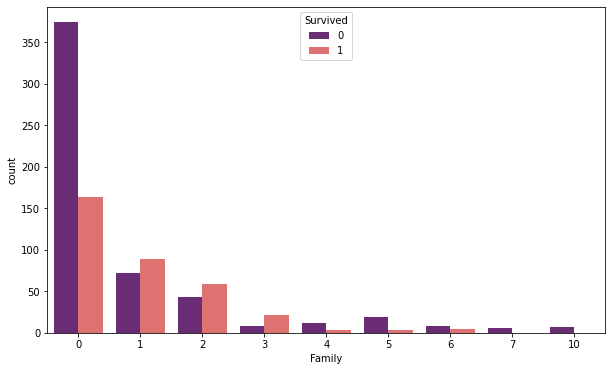

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Family',hue='Survived',data = titanic,palette='magma')

<AxesSubplot:xlabel='Family', ylabel='count'>

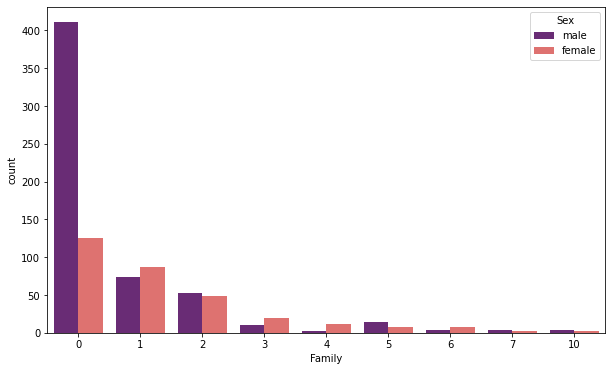

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Family',hue='Sex',data = titanic,palette='magma')

More females survived than males. Most males came alone. 

In [27]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
615,616,1,2,"Herman, Miss. Alice",female,24.000000,1,2,65.0000,S,3
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,512.3292,C,1
373,374,0,1,"Ringhini, Mr. Sante",male,22.000000,0,0,135.6333,C,0
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.000000,1,0,39.6000,C,1
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,7.6500,S,0
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.000000,1,1,110.8833,C,2
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.000000,0,0,12.6500,S,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,31.2750,S,6
270,271,0,1,"Cairns, Mr. Alexander",male,29.699118,0,0,31.0000,S,0
158,159,0,3,"Smiljanic, Mr. Mile",male,29.699118,0,0,8.6625,S,0


In [28]:
def name_extractor(name_column,data):
    names = data[name_column].values
    surname = [name.split(sep = ',') [0]for name in names]
    status = [name.split(sep = ',')[1].split(sep='.')[0] for name in names]
    
    data['Surname']=surname
    data['Status'] = status
    
    return data

In [29]:
titanic_new = name_extractor('Name',titanic)

In [30]:
titanic_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Surname,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,1,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,1,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,0,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,1,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,0,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,0,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,0,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,3,Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,0,Behr,Mr


In [31]:
# Drop name
titanic_new.drop('Name',axis=1,inplace =True)

In [32]:
titanic_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Surname,Status
0,1,0,3,male,22.000000,1,0,7.2500,S,1,Braund,Mr
1,2,1,1,female,38.000000,1,0,71.2833,C,1,Cumings,Mrs
2,3,1,3,female,26.000000,0,0,7.9250,S,0,Heikkinen,Miss
3,4,1,1,female,35.000000,1,0,53.1000,S,1,Futrelle,Mrs
4,5,0,3,male,35.000000,0,0,8.0500,S,0,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,0,Montvila,Rev
887,888,1,1,female,19.000000,0,0,30.0000,S,0,Graham,Miss
888,889,0,3,female,29.699118,1,2,23.4500,S,3,Johnston,Miss
889,890,1,1,male,26.000000,0,0,30.0000,C,0,Behr,Mr


# Convert

## Age

In [33]:
#Convert age to int
titanic_new['Age']= titanic_new['Age'].astype(int)

In [34]:
# Label and Code
titanic_new['Sex']= titanic_new['Sex'].replace({'male':0,'female':1})

In [35]:
# Using sklearn
from sklearn.preprocessing import LabelEncoder

columns = [column for column in titanic_new.columns if titanic_new[column].dtype == 'O']

In [36]:
columns

['Embarked', 'Surname', 'Status']

In [37]:
# Define the Encoder

encoder = LabelEncoder()

for column in columns :
    titanic_new[column] = encoder.fit_transform(titanic_new[column].astype(str))

In [38]:
titanic_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Surname,Status
0,1,0,3,0,22,1,0,7.2500,2,1,73,11
1,2,1,1,1,38,1,0,71.2833,0,1,136,12
2,3,1,3,1,26,0,0,7.9250,2,0,251,8
3,4,1,1,1,35,1,0,53.1000,2,1,198,12
4,5,0,3,0,35,0,0,8.0500,2,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,2,0,406,14
887,888,1,1,1,19,0,0,30.0000,2,0,221,8
888,889,0,3,1,29,1,2,23.4500,2,3,293,8
889,890,1,1,0,26,0,0,30.0000,0,0,52,11


# MODELLING - Machine learning

* Supervised - features and a target
** Regression - Continuous Variable
** Classification - Class
* Unsupervised - features no target
** Clustering
** Detecting anaomalies 
** Trying to reduce the dimensionality of your data
* Reinforcement - like humans
ie Alpha Go
** Mainly used in gaming and robotics


Famous algorithms
- linear regressions(linear) (logistic-classification,linear-regression)
- decision tree
- support vector machines(linear)
- naive bayes
- random forest
- adaboost
- gradient boosting algos (most powerful)
      -XGBoost
      -CatBoost
      -Light GBM

## Split Data - train,validate,test

In [39]:
titanic_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Family', 'Surname', 'Status'],
      dtype='object')

In [40]:
to_use = ['Pclass', 'Sex', 'Age','Fare', 'Embarked', 'Family', 'Surname', 'Status']

In [41]:
#Separate the features from the target - we do not want the model to see the target
features = titanic_new[to_use]

target = titanic_new['Survived']

In [42]:
from sklearn.model_selection import train_test_split 

In [43]:
#tend to use x for features and y=target

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features,target,
                                                    train_size = 0.8,
                                                   random_state=42) #random_size prevents the model from cheating(overfitting)

In [45]:
## Modelling 
#Import the models
from sklearn.linear_model import LogisticRegression #used for classification problems
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Train the model

1. Logistic Regression

In [46]:
logistic = LogisticRegression()

logistic.fit(x_train,y_train)

C:\Users\Katrina Muchemi\Documents\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Evaluate it
from sklearn.metrics import classification_report

In [48]:
#Evaluate model
predictions = logistic.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [49]:
#training accuracy
logistic.score(x_train,y_train)

0.8019662921348315

This model is running well as there is no big difference between test accuracy and train score

2. DecisionTree Classifier

In [69]:
#Call the model
tree = DecisionTreeClassifier(random_state=42,max_depth=2)

#Train the model
tree.fit(x_train,y_train)

#Evaluate model
predictions = tree.predict(x_test)

print(classification_report(y_test,predictions))

print(tree.score(x_train,y_train))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       105
           1       0.88      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179

0.8033707865168539


This model is clearly overfitting


3 Random Forest

In [65]:
forest = RandomForestClassifier(random_state=0)

In [66]:
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [67]:
predictions = forest.predict(x_test)

In [68]:
print(classification_report(y_test,predictions))
print(forest.score(x_train,y_train))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       105
           1       0.81      0.84      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

0.9985955056179775


The model is overfitting